# Random Strings Simulation

In [6]:
import numpy as np
from scipy.optimize import root_scalar
import matplotlib.pyplot as plt
from len import bool_conv, inv_bool_conv, BinaryH, finite_len_ab, H
%matplotlib widget
finiteapprox = finite_len_ab()
# Defining the constants
n0_ =  220//2
s_min = 0.401
r_min = 0.401 #79
qhat_pick_ = 0.350 # 0.33568
ALPHA = 0.5
p_ = 0.00

# Other things
q_ = bool_conv(p_, bool_conv(qhat_pick_,p_))
n = int(n0_/(1-ALPHA))
kp=  (1- BinaryH(q_))
print(f' kp is {kp};')
k = np.ceil(n*(1- finiteapprox.BinaryH(q_, n)))
print(f'k is {k}')
num_str = int(2**k) #* 16 
print(f'the number of strings are {num_str}')
choice_p = 0.5 # the probability of generating a 1 from the source if it is generated from the binomial


Initialised the finite length class
 kp is 0.06593194462450902;
k is 19.0
the number of strings are 524288


In [7]:
# Generating the random fixed points strings
fp_strings = np.random.choice(a = [False, True], size = (num_str, n), p = (1- choice_p, choice_p)) 
print(f' The shape of the string matrix {fp_strings.shape}')
print(f' The memory occupied of the string matrix {fp_strings.nbytes} bytes')
target_string = np.random.choice( a = [ False, True], size = (n-n0_,), p = [1 -choice_p, choice_p] )




STEP = int(ALPHA*n)
cmp_left_right = np.logical_xor(fp_strings[:, :int(ALPHA*n)], fp_strings[:, int(ALPHA*n): int(ALPHA*2*n)])
assert cmp_left_right.shape[0] == num_str
print(f'cmp left right shape {cmp_left_right.shape}')
s_arr = np.sum( cmp_left_right, axis = 1) /(ALPHA*n)
print(f's_arr shape {s_arr.shape}')

target_dist_1 = np.sum( np.logical_xor(target_string, fp_strings[:,:STEP]), axis= 1)
target_dist_2 = np.sum( np.logical_xor(target_string, fp_strings[:,STEP:2*STEP]), axis= 1)
print(target_dist_1.shape)
print(target_dist_2.shape)

# concatenated = np.random.choice( a = [ False, True], size = (n0_,), p = [1 -choice_p, choice_p] )
target_string = np.hstack((target_string, target_string))

rhat_arr = np.where( target_dist_1 >target_dist_2, target_dist_1, target_dist_2)/(STEP)
print(rhat_arr.shape)
# del target_dist_1, target_dist_2, cmp_left_right
print(f'Target String Shape {target_string.shape}')

 The shape of the string matrix (524288, 220)
 The memory occupied of the string matrix 115343360 bytes
cmp left right shape (524288, 110)
s_arr shape (524288,)
(524288,)
(524288,)
(524288,)
Target String Shape (220,)


In [8]:
def root(rh, s, k, n):
    probs = np.array([1 - rh - s/2, s/2, s/2 , rh -s/2])
    # print('ps:',probs)
    return (k/n) + finiteapprox.H_n(probs,n, 4) - 2
    # return (k/n) + H(probs) - 2
print( 'The extra thing: ',  ( (1/2-4/2)*np.log2(2*np.pi*ALPHA*n) +1/(ALPHA*n) )/n )

The extra thing:  -0.06427360388820254


In [9]:
s_plt = list()
r_plt = list()

smax = 1 - (1-2*qhat_pick_)/ALPHA
s_check = np.linspace(np.min(s_arr), smax , 100)
print(f' args ( k, n0_) {( k, n0_)}')
for ss in (s_check):
    #args = (ss, k, ALPHA, n)
    args = (ss, k, n0_)
    #print(f'Sol args: {args}')
    fun = lambda x:root(x, *args)
    try:
        sol =root_scalar(fun, bracket= (ss/2, 0.5))
        if sol.converged:
            s_plt.append(ss)
            r_plt.append(sol.root)
    except ValueError:
        continue
#arg_inds = np.argsort(s_plt)
s_plt = np.array(s_plt)#[arg_inds]
r_plt = np.array(r_plt)#[arg_inds]


 args ( k, n0_) (np.float64(19.0), 110)


In [49]:
# #
# # tolerance: Just doing a basic 1D grid search if the root(rh) -0 = tol 
# # we say rh is solution
# r = np.linspace(rhat_arr.min(), rhat_arr.max(), 100)
# tol = 0.0001 
# smax = 1 - (1-2*qhat_pick_)/ALPHA
# r_check = np.linspace(0, 0.5, 100)
# s_check = np.linspace(np.min(s_arr), smax , 100)
# r_plt = list()
# s_plt = list()

# for ss in (s_check):
#    args = (ss, k, n0_)
#    rcheck  = list()
#    for rr in r_check:
#        root_check = root(rr, *args)
#        cond = np.abs(root_check - 0) <tol
#        if cond:
#            #s_plt.append(ss)
#            rcheck.append((rr, root_check))
#            #print(f'Broken, {ss} {rr}')
#    if len(rcheck) == 0:
#        continue
#    else:
#        s_plt.append(ss)
#        rmin = sorted(rcheck, key = lambda x: np.abs(x[1]) )[0]
#        r_plt.append(rmin[0])


# #assert len(s_plt) <=3
# print(f' lens = {len(s_plt)}' )
# s_plt = np.array(s_plt)
# r_plt = np.array(r_plt) 
# #


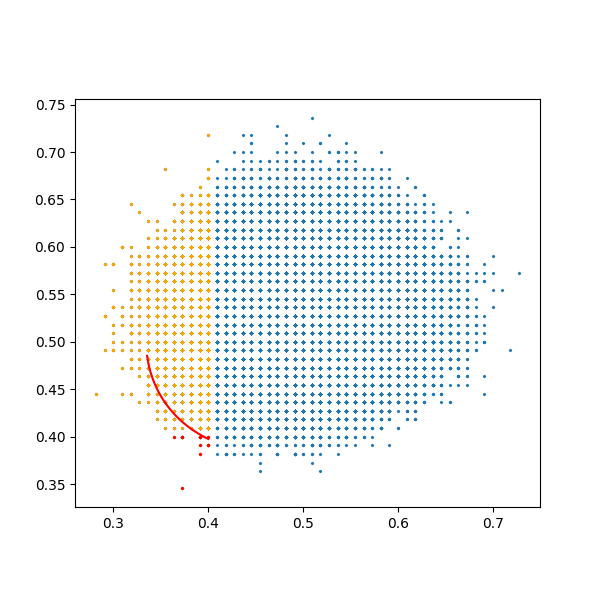

In [11]:
# Plot 
inds_other = s_arr/4 + 0.25 <=qhat_pick_
ind = s_arr <= s_min
size = 2
ind2 = np.logical_and(ind, rhat_arr<=r_min)

plt.figure(figsize=(6,6))
plt.scatter( s_arr, rhat_arr, s = size, marker='x')
plt.scatter( s_arr[ind], rhat_arr[ind], s = size, marker='x',color = 'orange')
# plt.scatter( s_arr[inds_other], rhat_arr[inds_other], s = size, marker='x',color = 'violet')
plt.scatter( s_arr[ind2], rhat_arr[ind2], s = size, color = 'red', marker='x')
plt.plot(s_plt, r_plt, color = 'red')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [ ]:
get_str = 

# Reconstructing the Strings 
    (Left part of left substr + Right part of the right substr)

In [6]:
indices = ind2
# print(ind.shape)
rem = fp_strings[indices]
rem_size = rem.shape[0]
rem_s = s_arr[indices]
rem_rh = rhat_arr[indices]

random_append = np.random.choice([False, True], size = (rem_size, n0_), p =(1-choice_p,choice_p))
constructed_strs = np.hstack( ( rem[:, :STEP//2],
                                rem[:, round(1.5*STEP):2*STEP],
                                random_append) )
# constructed_self_str = np.hstack( ( fp_strings[:, :STEP],
                                # fp_strings[:, round(*STEP):2*STEP]
print(constructed_strs.shape)  
assert constructed_strs.shape == ( rem_size, n)


(16, 220)


In [7]:
ind_in_ints = np.arange(0, num_str, 1)[indices]

In [8]:
min_dists_other = np.zeros(rem_size)
old_str_dist = np.zeros(rem_size)

# for i, vals in enumerate(zip(constructed_strs[:], ind_in_ints)):
#     a_str, sam_i = vals
#     dist = np.logical_xor(rem[i,: ], a_str)
#     old_str_dist[i] = np.sum(dist)
#     min_dis = np.inf
#     for j, b_str in enumerate(fp_strings[:]):
#         if sam_i==j:
#             continue
#         dist = np.logical_xor( a_str, b_str)
#         assert dist.ndim == 1
#         min_dis = min(np.sum(dist), min_dis)
#     min_dists_other[i] = min_dis
    

min_dists_other = np.zeros(rem_size)
old_str_dist = np.zeros(rem_size)

for i, a_str in enumerate(constructed_strs[:]):
    dist = np.logical_xor(rem[i,: ], a_str)
    old_str_dist[i] = np.sum(dist)
    min_dis = np.inf
    for j, b_str in enumerate(constructed_strs[:]):
        if i==j:
            continue
        dist = np.logical_xor( a_str, b_str)
        assert dist.ndim == 1
        min_dis = min(np.sum(dist), min_dis)
    min_dists_other[i] = min_dis

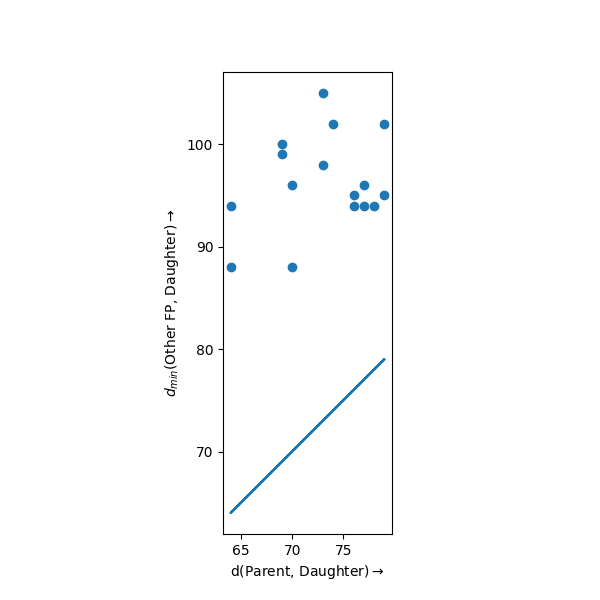

In [9]:
plt.cla()
plt.scatter(old_str_dist, min_dists_other)
plt.plot(old_str_dist, old_str_dist)
plt.xlabel(r'd(Parent, Daughter)$\to$')
plt.ylabel(r'$d_{min}$(Other FP, Daughter)$\to$')
plt.show()

In [30]:
print(np.sum(old_str_dist <= min_dists_other))
print(old_str_dist.shape)

20
(46,)


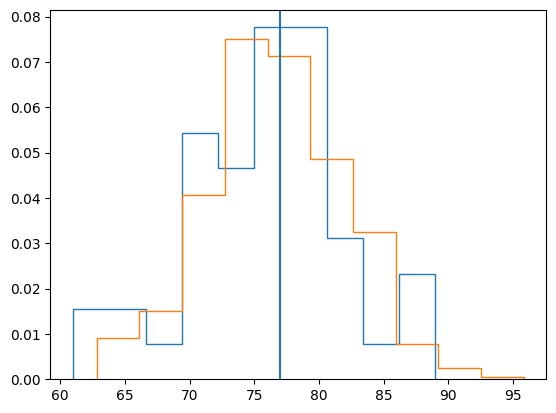

In [25]:
plt.hist(old_str_dist, histtype='step', density=True)
plt.hist(np.random.binomial(n0_, 0.5, 1000) + s_min*n/4 , histtype='step', density=True)
plt.axvline(x = qhat_pick_*n)

In [26]:
dists_target = np.zeros(rem_size)
old_str_dist = np.zeros(rem_size)

for i, vals in enumerate(zip(constructed_strs[:], ind_in_ints)):
    a_str, sam_i = vals
    dist = np.logical_xor(rem[i,: ], a_str)
    old_str_dist[i] = np.sum(dist)
    dist = np.logical_xor(target_string, a_str)
    dists_target[i] = np.sum(dist)
        


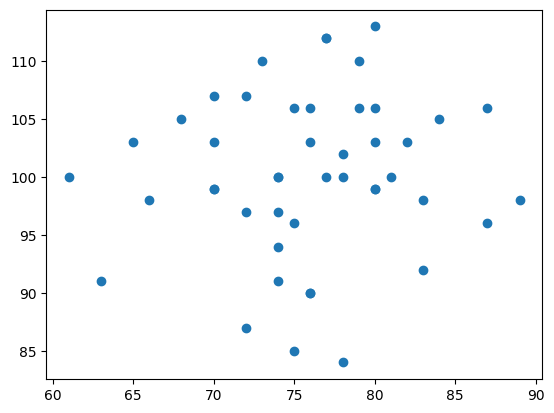

In [27]:
# %matplotlib widget
plt.clf()
plt.scatter(old_str_dist, dists_target)
plt.show()

In [28]:
qhat_pick_*n

77.0